<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Working%20with%20images/Convolution_101_detecting_edges_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

### The feature extraction , three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (ReLU)
* Condense the image to enhance the features (maximum pooling)

## Load the image

In [2]:
# author https://unsplash.com/@aahubs
url = "https://images.unsplash.com/photo-1618863099278-75222d755814?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"

file = tf.keras.utils.get_file('car',origin=url)

In [3]:
# reading the image
raw = tf.io.read_file(file)
# decode
img = tf.image.decode_jpeg(raw)

Let's view the image

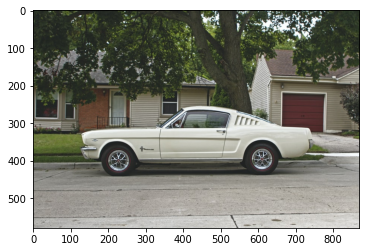

In [4]:
plt.imshow(img);

## Edge detection

For the filtering step, we'll define a kernel and then apply it with the convolution. The kernel in this case is an "edge detection" kernel. You can define it with tf.constant just like you'd define an array in Numpy with np.array.

In [5]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

In [6]:
kernel3d = tf.stack([kernel,kernel,kernel],axis=2)
kernel3d.shape

TensorShape([3, 3, 3])

In [7]:
# input tensor of shape batch_shape + [in_height, in_width, in_channels]
# convert to float dtype
input_img = tf.image.convert_image_dtype(img, tf.float32)
# add batch dimension to the image
input_img = tf.expand_dims(input_img, axis=0)

# filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
input_kernel = tf.reshape(kernel3d, shape=[*kernel.shape,3,1])
input_kernel = tf.cast(input_kernel, dtype=tf.float32)

In [8]:
print(f'Input image shape : {input_img.shape}\nKernel shape : {input_kernel.shape}')

Input image shape : (1, 580, 870, 3)
Kernel shape : (3, 3, 3, 1)


## Convolution operation

In [9]:
filtered_img = tf.nn.conv2d(input=input_img, filters=input_kernel, strides=1, padding='SAME')

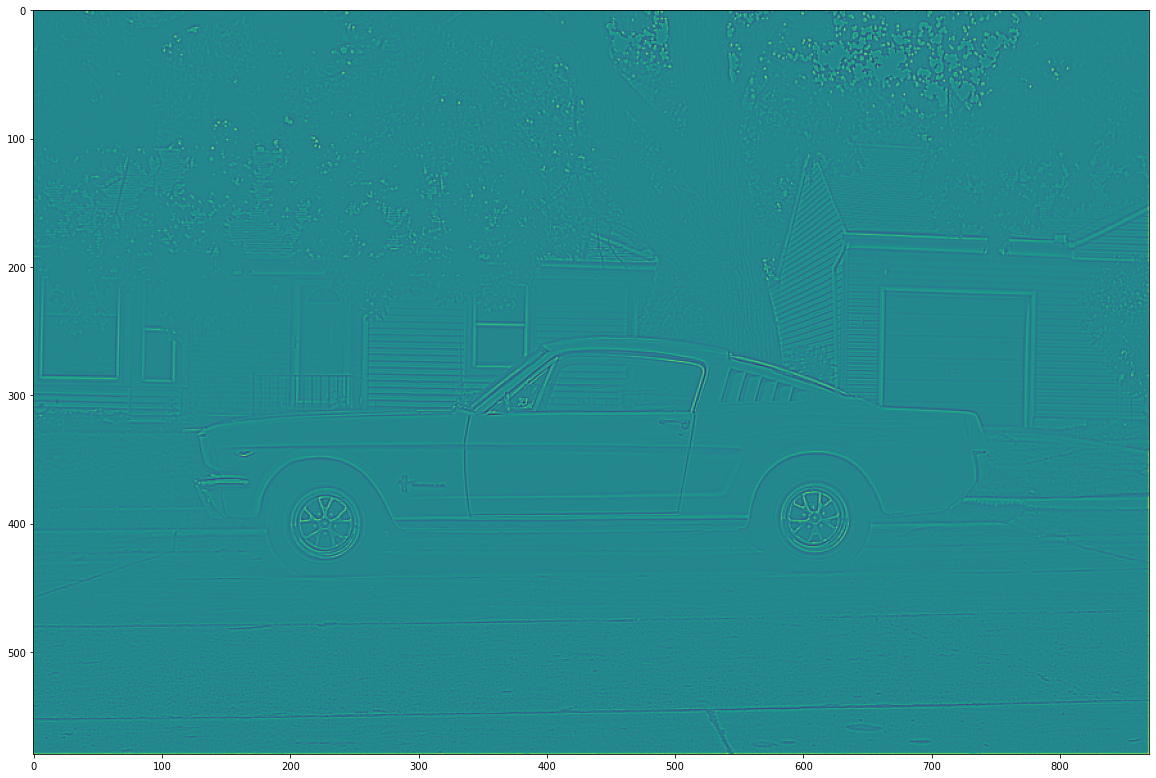

In [10]:
plt.figure(figsize=(20,30))
plt.imshow(tf.squeeze(filtered_img))

## Applying Nonlinear activation

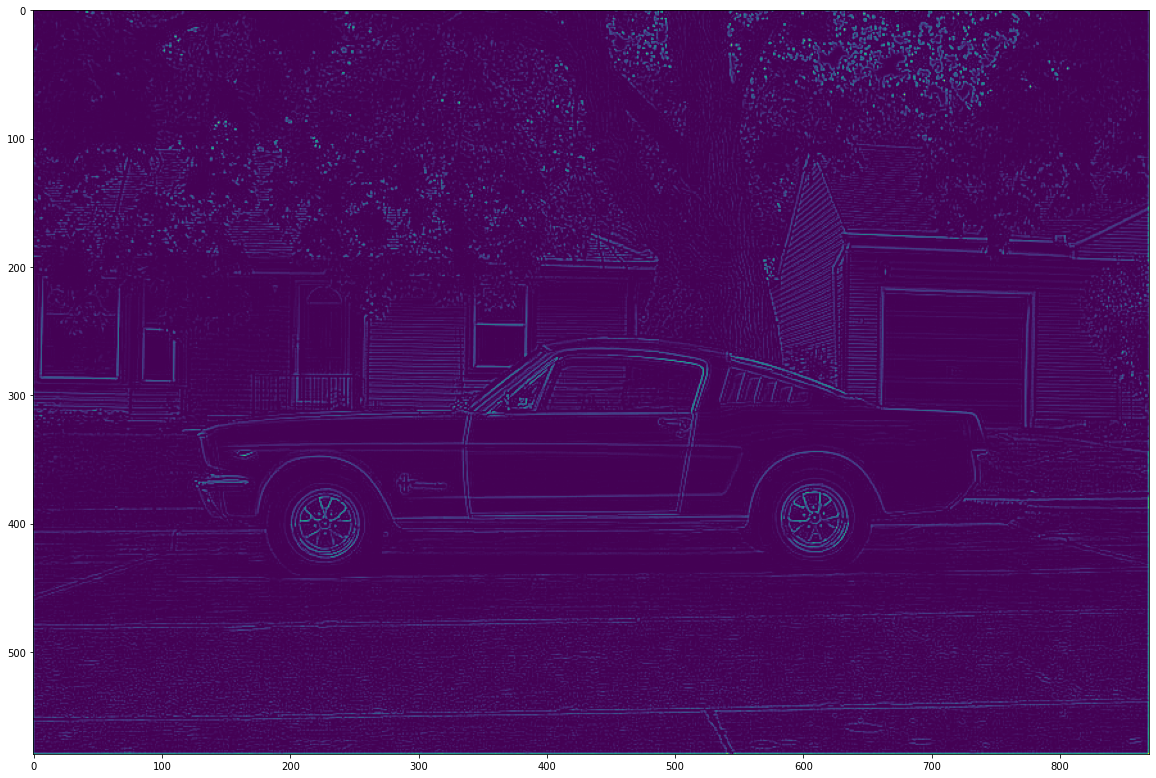

In [11]:
# lets apply ReLU
image_detect = tf.nn.relu(filtered_img)

plt.figure(figsize=(20,30))
plt.imshow(tf.squeeze(image_detect));

## Utility function 

In [12]:
def edge_detection(image_url, kernel, is_color_image=True, figsize=(10,10)):
  file = tf.keras.utils.get_file(origin=url)
  # reading the image
  raw = tf.io.read_file(file)
  # decode
  img = tf.image.decode_jpeg(raw, channels=1) if not is_color_image else tf.image.decode_jpeg(raw, channels=3)

  # image => input tensor of shape batch_shape + [in_height, in_width, in_channels]
  input_img = tf.expand_dims(img, axis=0)
  # convert to float dtype
  input_img = tf.image.convert_image_dtype(input_img, tf.float32)
    
  # kernel => input tensor of shape batch_shape + [in_height, in_width, in_channels]
  input_kernel = kernel if not is_color_image else tf.stack([kernel]*3, axis=2)
  # filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
  input_kernel = tf.reshape(input_kernel, shape=[*input_kernel.shape,1,1]) if not is_color_image else tf.reshape(input_kernel, shape=[*input_kernel.shape,1])
  input_kernel = tf.cast(input_kernel, dtype=tf.float32)


  # convolution opereation
  filtered_img = tf.nn.conv2d(input=input_img, filters=input_kernel, strides=1, padding='SAME')

  # applying relu activation
  image_detect = tf.nn.relu(filtered_img)

  # visualization

  plt.figure(figsize=figsize)
  plt.subplot(3,1,1)
  plt.imshow(tf.squeeze(img))
  plt.title('Input image')
  plt.figure(figsize=figsize)
  plt.subplot(3,1,2)
  plt.imshow(tf.squeeze(filtered_img))
  plt.title('Convolution output before applying activation function')
  plt.axis('off')  
  plt.subplot(3,1,3)
  plt.imshow(tf.squeeze(image_detect))
  plt.title('Convolution output after applying activation function ReLU')
  plt.axis('off')


  return filtered_img, image_detect

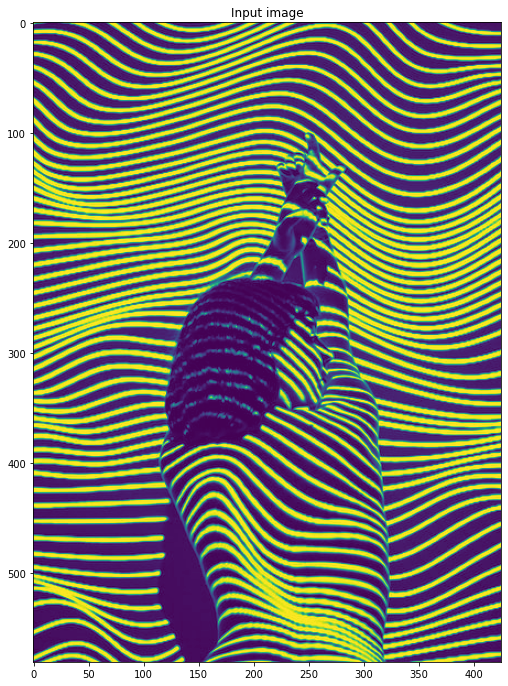

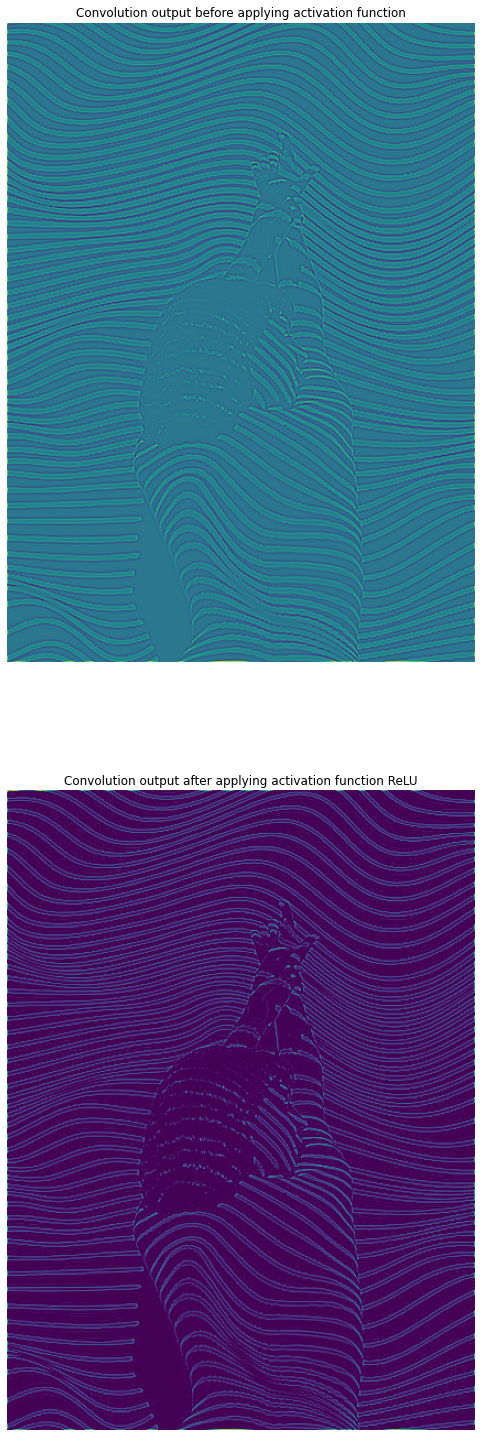

In [17]:
# https://unsplash.com/@lilianpereir
url = 'https://images.unsplash.com/photo-1529432337323-223e988a90fb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=425&q=80'

filtered_image, image_detect = edge_detection(url, kernel, is_color_image=False, figsize=(20,40))


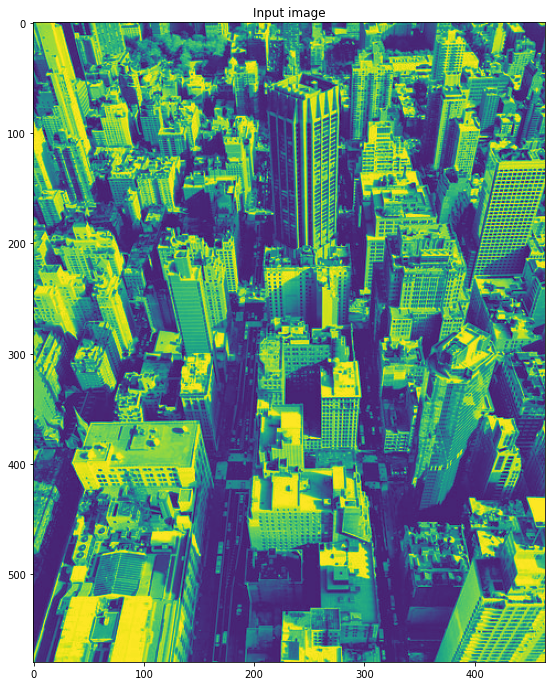

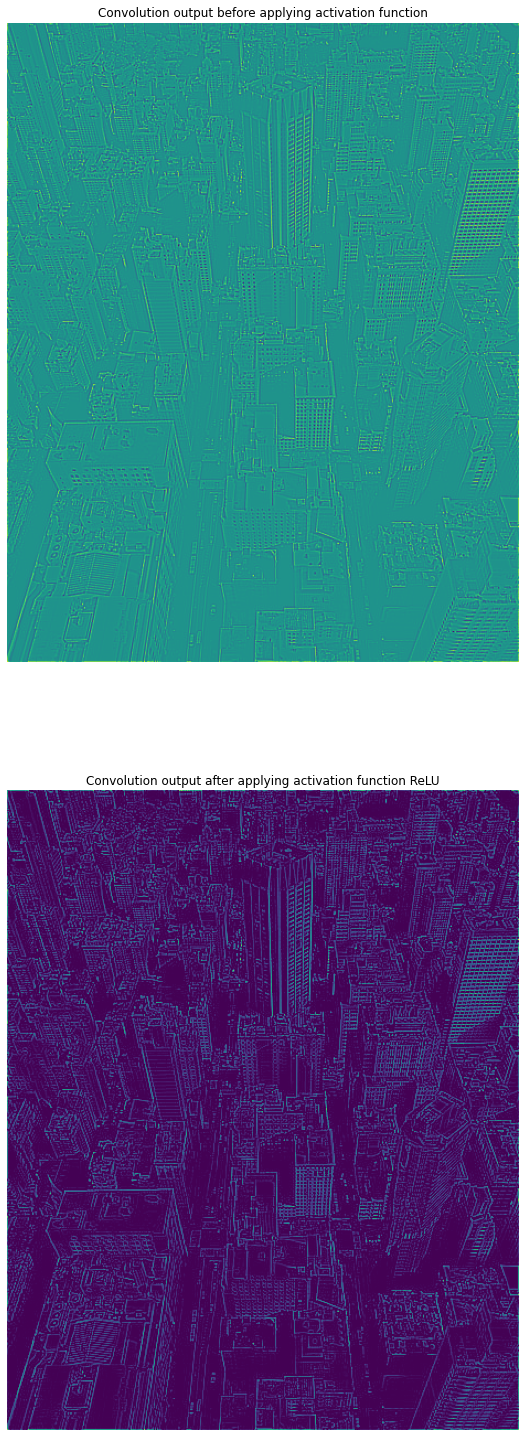

In [18]:
# author = https://unsplash.com/@pipeaguileram
url = 'https://images.unsplash.com/photo-1494768788897-7fdaa00de2a1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=464&q=80'
filtered_image, image_detect = edge_detection(url, kernel, is_color_image=False, figsize=(20,40))

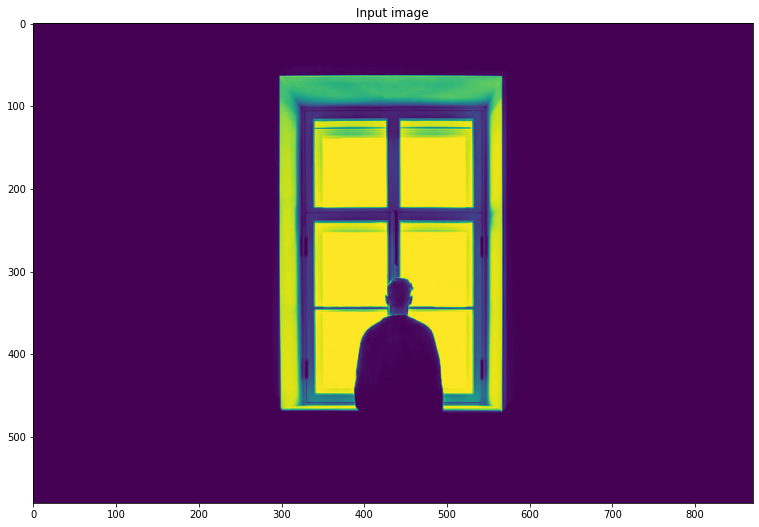

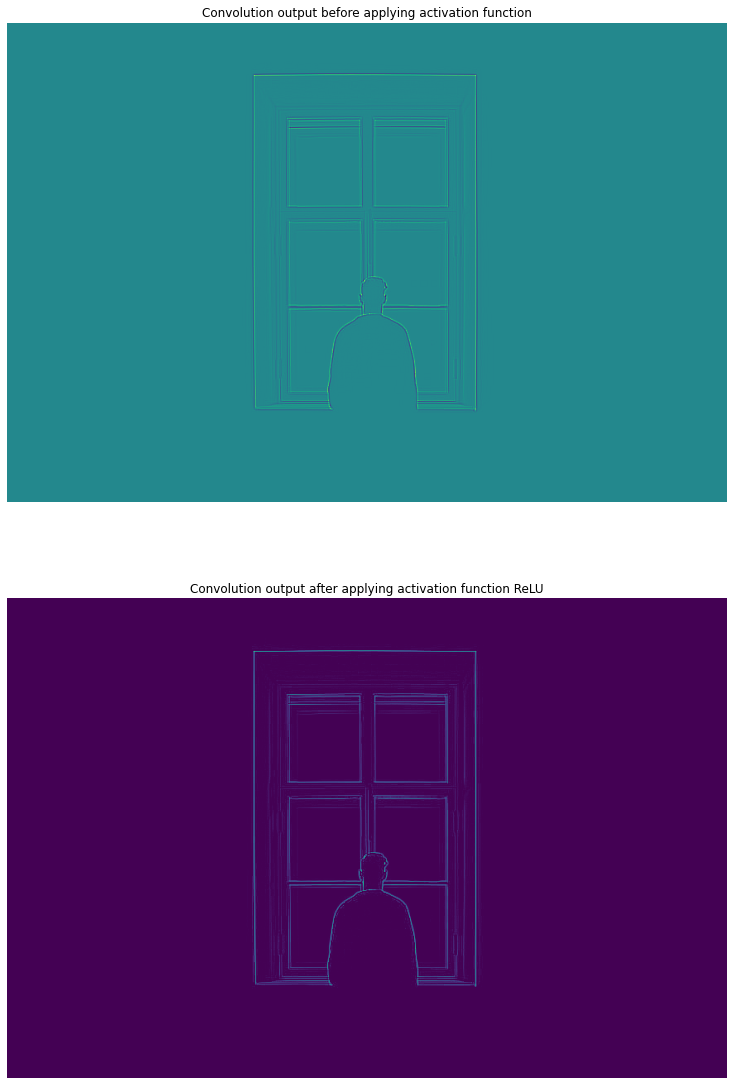

In [15]:
# author = https://unsplash.com/@sashafreemind
url = 'https://images.unsplash.com/photo-1534330207526-8e81f10ec6fc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80'
filtered_image, image_detect = edge_detection(url, kernel, is_color_image=False, figsize=(20,30))

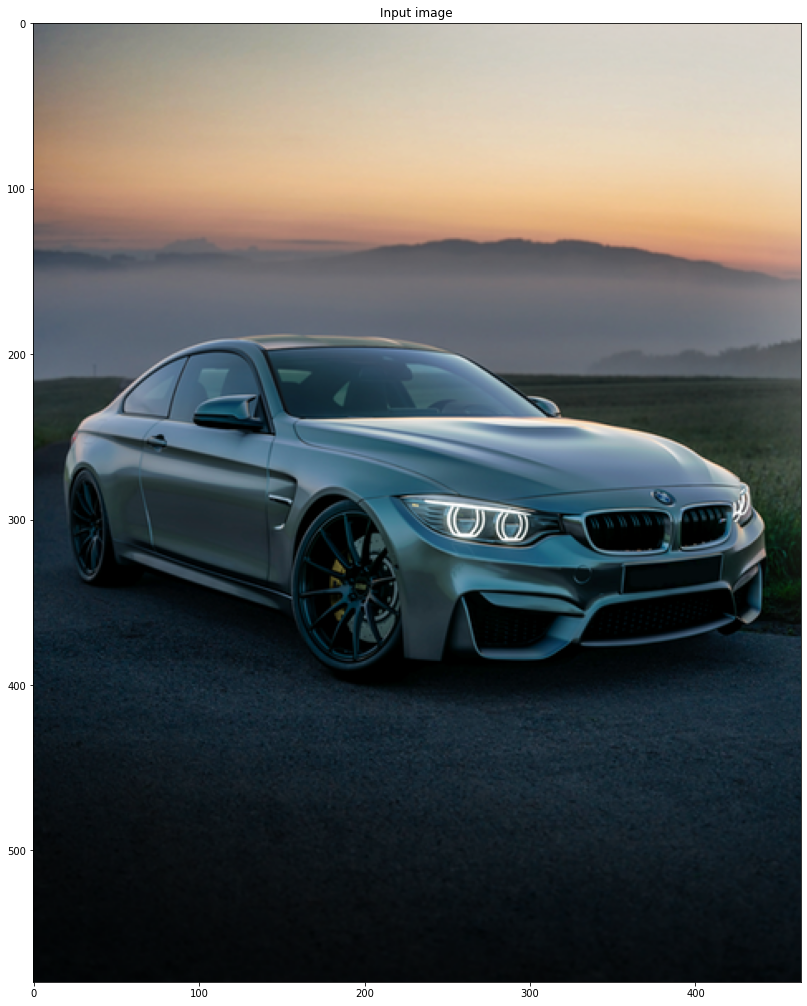

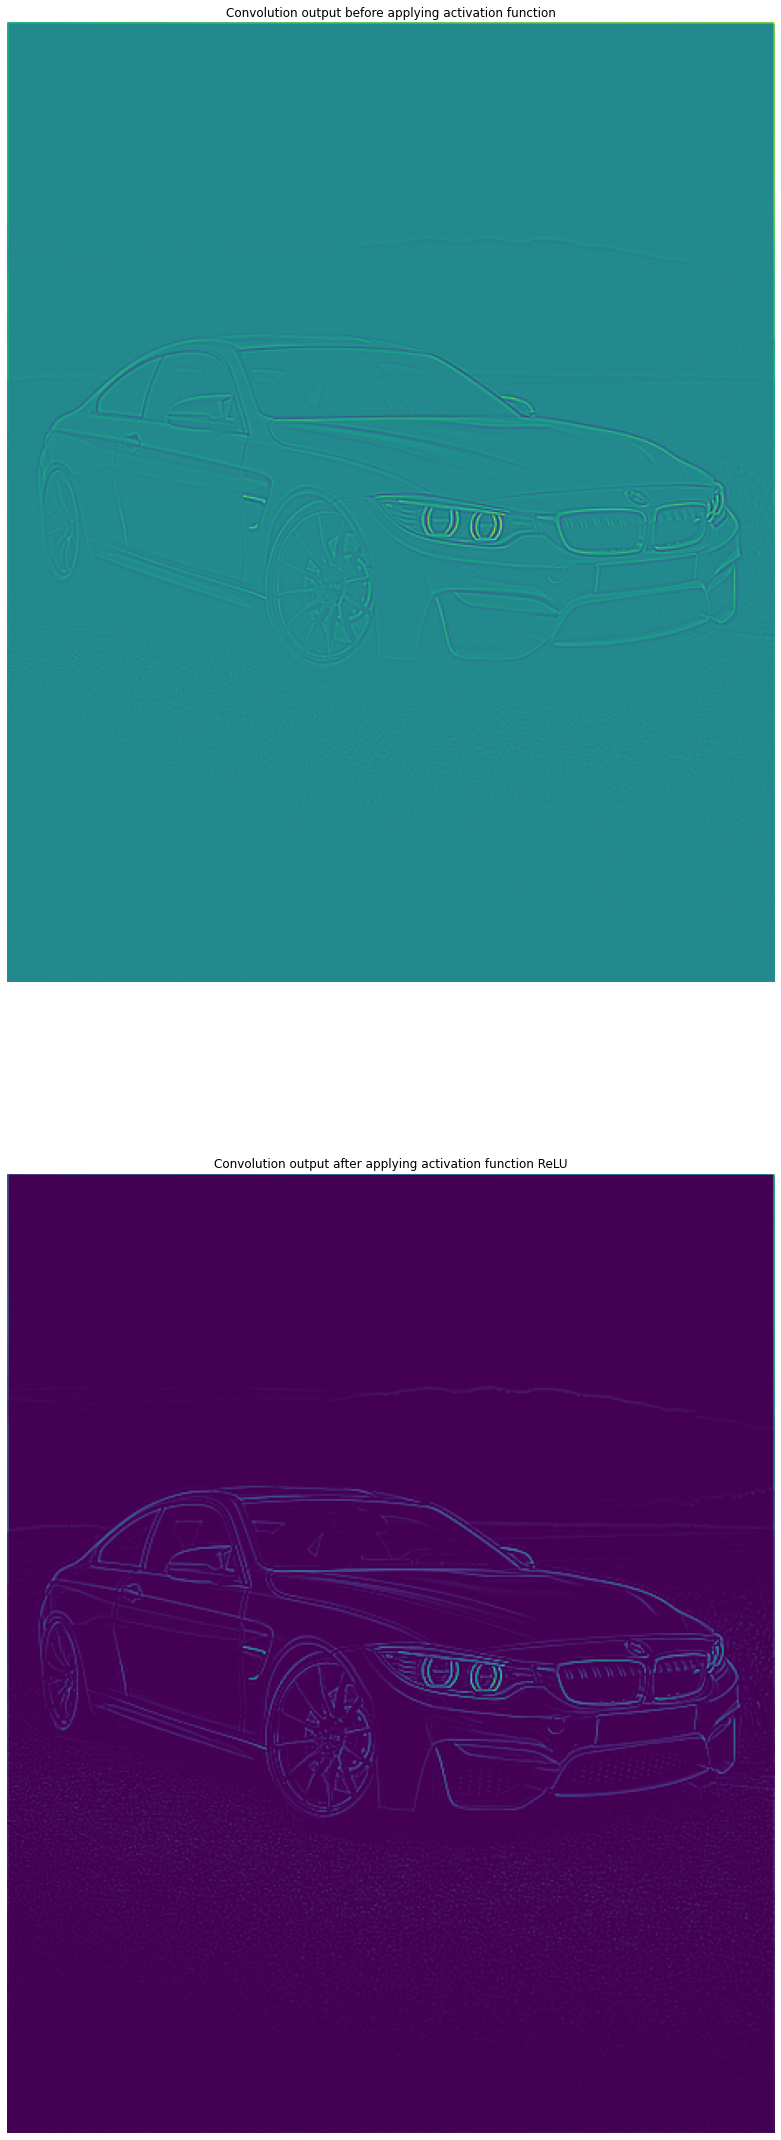

In [16]:
# author https://unsplash.com/@bbtl
url = "https://images.unsplash.com/photo-1580273916550-e323be2ae537?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=464&q=80"
filtered_image, image_detect = edge_detection(url, kernel, is_color_image=True, figsize=(30,60))